# WeatherPy
----

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1400)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1400)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

587


In [4]:
# Starting URL for Weather Map API Call
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

city_weather = []
city_data= []
counter = 1
set = 1

# Loop through the list of cities and perform a request for data on each and print a log.
print ("Beginning Data Retrieval")
print ("------------------------")

for city in cities:
    #Use URL plus name of city to connect to openweathermap.org's endpoint
        city_url = base_url + "&q=" + city
        try:
            city_weather = requests.get(city_url).json()
        # parse data and place values into variables that will be used for creating a df
            #pprint(city_weather)
            city_lat = city_weather["coord"]["lat"]
            city_lng = city_weather["coord"]["lon"]
            city_max_temp = city_weather["main"]["temp_max"]
            city_humidity = city_weather["main"]["humidity"]
            city_clouds = city_weather["clouds"]["all"]
            city_wind = city_weather["wind"]["speed"]
            city_country = city_weather["sys"]["country"]
            city_date = city_weather["dt"]
            city_data.append({"City": city,"Lat": city_lat,"lng": city_lng,"Max Temp": city_max_temp,"Humidity": city_humidity,"Cloudiness": city_clouds,
                         "Wind Speed": city_wind,"Country": city_country,"Date": city_date})
            print(f"processing record {counter} of set {set} | {city}")
            counter = counter + 1
            if counter > 50:
                counter = 1
                set = set + 1
                time.sleep(6) 
                #have to use sleep to overcome api call restriction, I can only make 300 api call per min.
        except:
            print(f"City not found. Skipping...")
        pass

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
------------------------
processing record 1 of set 1 | ossora
processing record 2 of set 1 | busselton
processing record 3 of set 1 | longyearbyen
City not found. Skipping...
processing record 4 of set 1 | vaini
processing record 5 of set 1 | atuona
processing record 6 of set 1 | lubumbashi
processing record 7 of set 1 | bluff
processing record 8 of set 1 | esperance
processing record 9 of set 1 | jamestown
processing record 10 of set 1 | hilo
processing record 11 of set 1 | las palmas
processing record 12 of set 1 | hobart
processing record 13 of set 1 | chokurdakh
City not found. Skipping...
processing record 14 of set 1 | amga
processing record 15 of set 1 | yellowknife
processing record 16 of set 1 | dikson
processing record 17 of set 1 | kapaa
City not found. Skipping...
City not found. Skipping...
processing record 18 of set 1 | nikolskoye
processing record 19 of set 1 | usinsk
processing record 20 of set 1 | punta arenas
processing record 21 of set 1 | 

In [14]:
# Convert array of JSONs into Pandas DataFrame
city_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_pd["Lat"]
max_temps = city_pd["Max Temp"]
humidity = city_pd["Humidity"]
cloudiness = city_pd["Cloudiness"]
wind_speed = city_pd["Wind Speed"]

# Export the City_Data into a csv
city_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_pd.count()

City          536
Lat           536
lng           536
Max Temp      536
Humidity      536
Cloudiness    536
Wind Speed    536
Country       536
Date          536
dtype: int64

In [6]:
city_pd.head()

,City,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ossora,59.24,163.07,30.40,96,100,25.03,RU,1579918884
1,busselton,-33.65,115.33,84.99,30,0,5.37,AU,1579919047
2,longyearbyen,78.22,15.64,1.40,49,20,18.34,SJ,1579919047
3,vaini,-21.20,-175.20,84.20,74,40,13.87,TO,1579918997
4,atuona,-9.80,-139.03,80.96,77,0,12.80,PF,1579918892


### Plotting the Data

#### Latitude vs. Temperature Plot

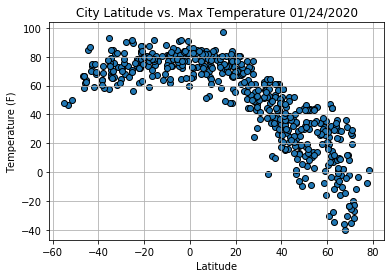

<Figure size 720x576 with 0 Axes>

In [16]:
date = time.strftime("%m/%d/%Y")

plt.scatter(lats, max_temps, marker="o", edgecolor='black')
plt.title(f"City Latitude vs. Max Temperature {date}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid()
plt.figure(figsize=(10,8))

# Save the figure
plt.savefig("../output_data/LatVsTemp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

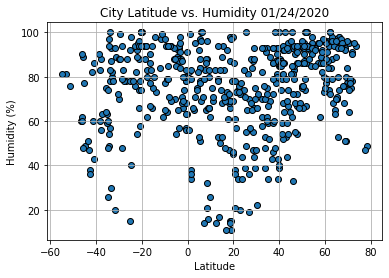

<Figure size 720x576 with 0 Axes>

In [15]:
date = time.strftime("%m/%d/%Y")

plt.scatter(lats, humidity,marker="o", edgecolor='black')
plt.title(f"City Latitude vs. Humidity {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.figure(figsize=(10,8))

# Save the figure
plt.savefig("../output_data/LatVsHumidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

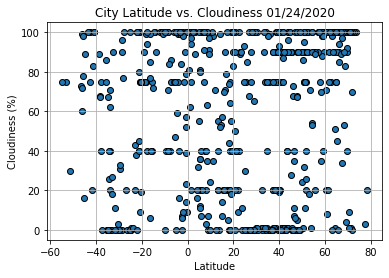

<Figure size 720x576 with 0 Axes>

In [17]:
date = time.strftime("%m/%d/%Y")

plt.scatter(lats, cloudiness,marker="o", edgecolor='black')
plt.title(f"City Latitude vs. Cloudiness {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.figure(figsize=(10,8))

# Save the figure
plt.savefig("../output_data/LatVsCloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

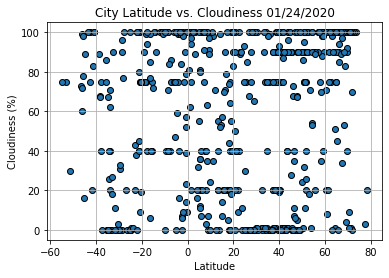

<Figure size 720x576 with 0 Axes>

In [18]:
date = time.strftime("%m/%d/%Y")

plt.scatter(lats, cloudiness, marker="o", edgecolor='black')
plt.title(f"City Latitude vs. Cloudiness {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.figure(figsize=(10,8))

# Save the figure
plt.savefig("../output_data/LatVsWindSpeed.png")

# Show plot
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots
from scipy.stats import linregress

In [ ]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_df.loc[weather_df.Latitude >= 0]
southern_df = weather_df.loc[weather_df.Latitude < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression